Assignment:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df=pd.read_csv("/content/drive/MyDrive/Fraud_check.csv")

In [36]:
df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [38]:
#Label Encoding for categorial data
label_encoding=preprocessing.LabelEncoder()
df['Undergrad']=label_encoding.fit_transform(df['Undergrad'])
df['Marital.Status']=label_encoding.fit_transform(df['Marital.Status'])
df['Urban']=label_encoding.fit_transform(df['Urban'])



In [39]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [40]:
#Categorial Data Based on Taxable income
tax_value=[]
for i in df['Taxable.Income']:
  if i<=30000:
    tax_value.append("risky")
  else:
    tax_value.append("Good")  
df['tax_value']=tax_value    

In [41]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [42]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Marital.Status   600 non-null    int64 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int64 
 6   tax_value        600 non-null    object
dtypes: int64(6), object(1)
memory usage: 32.9+ KB


In [44]:
fraud_df=df.drop(['Taxable.Income'],axis=1)

In [45]:
fraud_df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [46]:
#Define Independent and Dependant variable
x=fraud_df.iloc[:,0:5]  #Independent variable
y=fraud_df['tax_value'] #dependent variable

In [47]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [48]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_value, Length: 600, dtype: object

In [49]:
#identifing unique class
fraud_df['tax_value'].unique()

array(['Good', 'risky'], dtype=object)

In [50]:
#count of each class
fraud_df.tax_value.value_counts()

Good     476
risky    124
Name: tax_value, dtype: int64

In [51]:
#Preparig test and trained dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

#Decision Tree Classifier C5.0 using Entropy Criteria

In [52]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'City.Population <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]\nclass = Good'),
 Text(0.25, 0.5, 'City.Population <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]\nclass = Good'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.753\nsamples = 37\nvalue = [29, 8]\nclass = Good'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.144\nsamples = 49\nvalue = [48, 1]\nclass = Good'),
 Text(0.75, 0.5, 'City.Population <= 195947.0\nentropy = 0.768\nsamples = 334\nvalue = [259, 75]\nclass = Good'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.781\nsamples = 324\nvalue = [249, 75]\nclass = Good'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Good')]

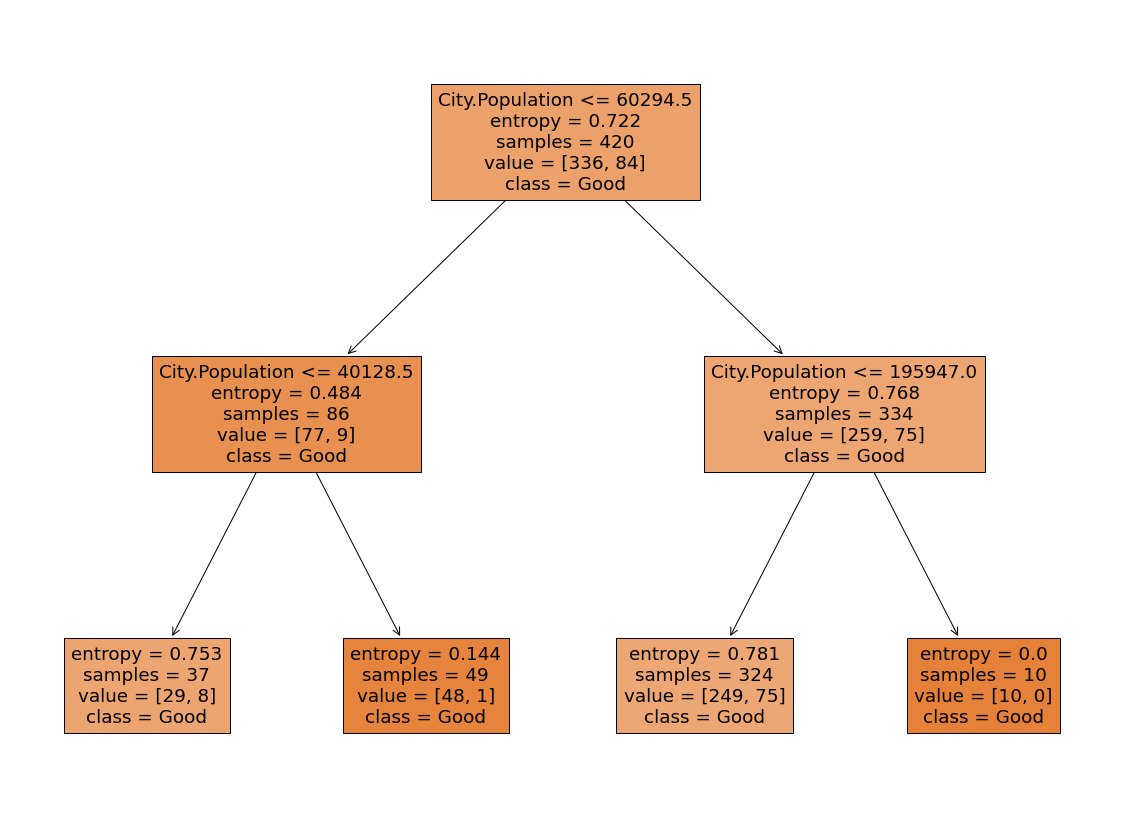

In [53]:
#Visualizing decision tree
fig=plt.figure(figsize=(20,15))
tree.plot_tree(model,feature_names=['Udergrad','Marital.Status','City.Population','Work.Experience','Urban'],class_names=['Good','Risky'],filled=True)

In [54]:
#predicting on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

Good    180
dtype: int64

In [55]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [56]:
#cross tab
pd.crosstab(y_test,pred)

col_0,Good
tax_value,
Good,140
risky,40


In [57]:
140/180

0.7777777777777778

In [58]:
#calculating accuracy
np.mean(pred==y_test)

0.7777777777777778

#77 % Accuracy

#Building Decision Tree Classifier (CART) using Gini Creteria

In [61]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

Text(0.5, 1.0, 'Decision Tree using gini criteria')

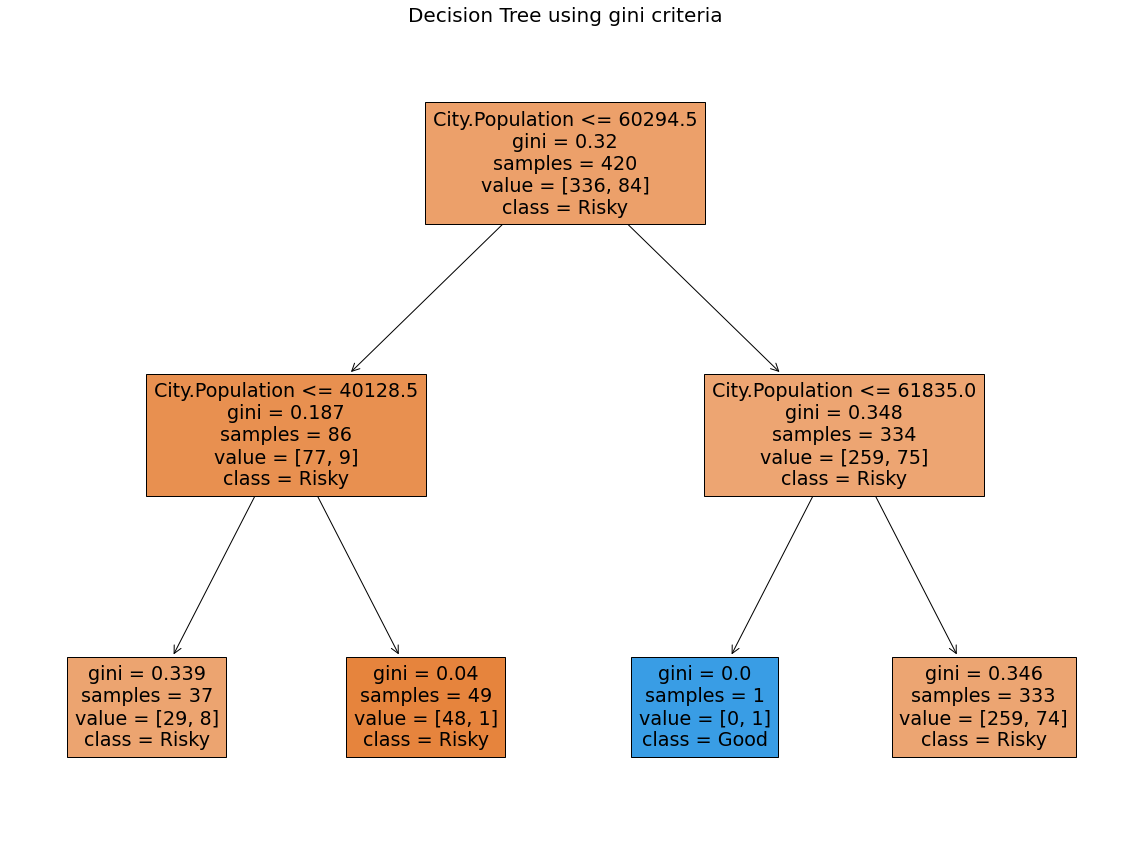

In [62]:
#Visualizing Decision Tree
figure=plt.figure(figsize=(20,15))
tree.plot_tree(model1,feature_names=['Udergrad','Marital.Status','City.Population','Work.Experience','Urban'],class_names=['Risky','Good'],filled=True)
plt.title('Decision Tree using gini criteria',fontsize=20)

In [64]:
#Predicting Values on Test Data
pred_gini=model1.predict(x_test)
pd.Series(pred_gini).value_counts() #Getting the count of each category



Good    180
dtype: int64

In [65]:
pred_gini

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [66]:
#Cross Table
pd.crosstab(pred_gini,y_test)

tax_value,Good,risky
row_0,,
Good,140,40


In [67]:
140/180

0.7777777777777778

In [68]:
#calculating Accuracy
np.mean(pred_gini==y_test)

0.7777777777777778

#77 % Accuracy